In [15]:
#Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
global describe
global daily_return_plot
global rolling_std_plot


In [16]:
# Calling notebook (historical exchange data) to create historical exchange dataframe
%run HED.ipynb

Stored 'hed_df' (DataFrame)


In [17]:
# Restore Data from historical exchange dataframe 
%store -r hed_df

In [18]:
# Reading clean data of historical exchange dataframe 
hed_df.head()


,Close
Date,
2022-01-02,1.1341
2022-01-03,1.1301
2022-01-04,1.1291
2022-01-05,1.1315
2022-01-06,1.1303


In [19]:
# List the overview of the data
describe = hed_df.describe()
describe

,Close
count,716.000000
mean,1.069714
std,0.037367
min,0.956000
25%,1.054775
50%,1.076250
75%,1.092170
max,1.147300


In [20]:
#Calculate Daily Returns

pct_change_df= hed_df['Close'].pct_change()
pct_change_df.head()

Date
2022-01-02         NaN
2022-01-03   -0.003527
2022-01-04   -0.000885
2022-01-05    0.002126
2022-01-06   -0.001061
Name: Close, dtype: float64

In [21]:
# Drop nulls

pct_change_df= pct_change_df.dropna()
pct_change_df.head()

Date
2022-01-03   -0.003527
2022-01-04   -0.000885
2022-01-05    0.002126
2022-01-06   -0.001061
2022-01-07    0.005220
Name: Close, dtype: float64

In [22]:
# Plot daily returns

daily_return_plot = pct_change_df.hvplot.line(
    xlabel='Date',
    ylabel = 'Percent Change',
    title= 'Daily Returns')

daily_return_plot

:Curve   [Date]   (Close)

In [23]:
#Calculate the standard deviation of daily exchange rates

hed_std = pct_change_df.std()
hed_std

0.004856741667554545

In [24]:
#Calculate rolling standard deviation for 21-day window

rolling_std = pct_change_df.rolling(window= 21).std()

#Plot rolling standard deviation 
rolling_std_plot = rolling_std.hvplot(
    xlabel='Date',
    ylabel = 'Percent Change',
    title= '21 Day Rolling Standard Deviation'
    )

rolling_std_plot

:Curve   [Date]   (Close)

In [25]:
#Calculate the annualized standard deviation (252 trading days)

annualized_std = hed_std * np.sqrt(252)
annualized_std

0.07709838380660679

(<Figure size 1000x500 with 1 Axes>,
 Text(0.5, 1.0, 'USD/Euro Closing Prices'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Close Price'),
 None)

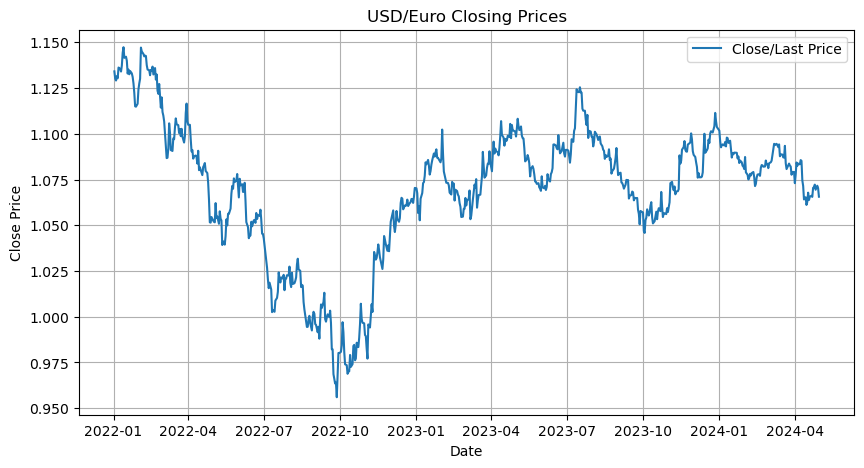

In [40]:
# Plotting the 'Close/Last' price to visualize trends and patterns
closing_plot=(
plt.figure(figsize=(10,5)),
plt.plot(hed_df['Close'], label='Close/Last Price'),
plt.title('USD/Euro Closing Prices'),
plt.xlabel('Date'),
plt.ylabel('Close Price'),
plt.legend(),
plt.grid(True)
)
closing_plot